In [65]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from time import time

In [66]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
plt.rcParams['image.interpolation'] = 'none'

In [67]:
nb_classes = 9
batch_size = 64
nb_epoch = 10
np.random.seed(1337) # for reproducibility

In [68]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.1)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

In [69]:
model = Sequential()
model.add(Dense(input_dim=784, output_dim=256, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(input_dim=256, output_dim=64, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(input_dim=64, output_dim=9, init="uniform"))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy', optimizer='sgd')
model.fit(trainX, trainY, 
          batch_size=batch_size, 
          nb_epoch=nb_epoch, 
          show_accuracy=True, 
          verbose=0,
          validation_data=(testX, testY))

{'acc': [0.29092592592592592,
  0.39481481481481484,
  0.45555555555555555,
  0.71166666666666667,
  0.85648148148148151,
  0.89296296296296296,
  0.90537037037037038,
  0.9094444444444445,
  0.91074074074074074,
  0.91259259259259262],
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'loss': [2.1643061398337666,
  2.0698182916394638,
  1.8276264518466661,
  1.340994842839327,
  0.89967364979516151,
  0.64994454380597799,
  0.52833388661897829,
  0.46900542652993621,
  0.4346363471885758,
  0.41289908407941472],
 'val_acc': [0.2625,
  0.47073863636363633,
  0.51875,
  0.8605113636363637,
  0.859090909090909,
  0.9011363636363636,
  0.9133522727272727,
  0.9164772727272726,
  0.9119318181818181,
  0.9164772727272726],
 'val_loss': [2.126835175237152,
  1.98254575845174,
  1.5904237626925695,
  1.0769084770761232,
  0.7697297947142743,
  0.6117752771991137,
  0.5483211055457734,
  0.5200626924185944,
  0.49512226687768324,
  0.47677282680911126]}

In [70]:
model.layers

In [71]:
model1 = Sequential()
model1.add(Dense(input_dim=784, output_dim=256, init="uniform", weights=model.layers[0].get_weights()))
model1.add(Activation('relu'))
model1.compile(loss='categorical_crossentropy', optimizer='sgd')

In [72]:
print valX[0].shape
print valY[0]

(784,)
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.]


In [73]:
valX_h_1 = model1.predict(valX)

300/300 [==============================] - 0s     


[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]]


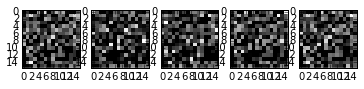

In [74]:
sample_0 = valX_h_1[0].reshape((16, 16))
sample_1 = valX_h_1[1].reshape((16, 16))
sample_2 = valX_h_1[2].reshape((16, 16))
sample_3 = valX_h_1[3].reshape((16, 16))
sample_4 = valX_h_1[4].reshape((16, 16))

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5)
ax0.imshow(sample_0, cmap='gray')
ax1.imshow(sample_1, cmap='gray')
ax2.imshow(sample_2, cmap='gray')
ax3.imshow(sample_3, cmap='gray')
ax4.imshow(sample_4, cmap='gray')
print valY[:5]

In [75]:
model2 = Sequential()
model2.add(Dense(input_dim=256, output_dim=64, init="uniform", weights=model.layers[2].get_weights()))
model2.add(Activation('relu'))
model2.compile(loss='categorical_crossentropy', optimizer='sgd')
valX_h_2 = model2.predict(valX_h_1)

300/300 [==============================] - 0s     


[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]]


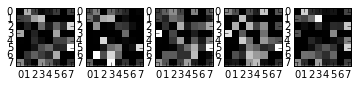

In [76]:
sample_0 = valX_h_2[0].reshape((8, 8))
sample_1 = valX_h_2[1].reshape((8, 8))
sample_2 = valX_h_2[2].reshape((8, 8))
sample_3 = valX_h_2[3].reshape((8, 8))
sample_4 = valX_h_2[4].reshape((8, 8))

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5)
ax0.imshow(sample_0, cmap='gray')
ax1.imshow(sample_1, cmap='gray')
ax2.imshow(sample_2, cmap='gray')
ax3.imshow(sample_3, cmap='gray')
ax4.imshow(sample_4, cmap='gray')
print valY[:5]

In [77]:
model3 = Sequential()
model3.add(Dense(input_dim=64, output_dim=9, init="uniform", weights=model.layers[4].get_weights()))
model3.add(Activation('relu'))
model3.compile(loss='categorical_crossentropy', optimizer='sgd')
valX_h_3 = model3.predict(valX_h_2)

300/300 [==============================] - 0s     


[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]]


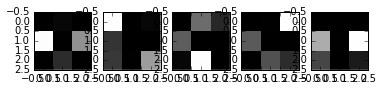

In [78]:
sample_0 = valX_h_3[0].reshape((3, 3))
sample_1 = valX_h_3[1].reshape((3, 3))
sample_2 = valX_h_3[2].reshape((3, 3))
sample_3 = valX_h_3[3].reshape((3, 3))
sample_4 = valX_h_3[4].reshape((3, 3))

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5)
ax0.imshow(sample_0, cmap='gray')
ax1.imshow(sample_1, cmap='gray')
ax2.imshow(sample_2, cmap='gray')
ax3.imshow(sample_3, cmap='gray')
ax4.imshow(sample_4, cmap='gray')
print valY[:5]